## **Reading the Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install pyspark
import pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 38 kB/s 
     |████████████████████████████████| 199 kB 60.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=016c8bdce366e2ecdec6dd7a33576fd26e7c45b6183242459ff2d26e615165bd
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [6]:
spark = pyspark.sql.SparkSession.builder\
        .master('local[*]')\
        .appName('vikram_finalProject final')\
        .getOrCreate()

In [7]:
sc = spark.sparkContext
sc.setLogLevel("ERROR")
sc

<SparkContext master=local[*] appName=vikram_finalProject final>

# **schema details, Data types and table description**

In [72]:
"""

  Reading the dataset

"""

df = spark.read.option("header",True).option("inferSchema" , "true").csv("drive/MyDrive/Big Data Project/out.csv", )

df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: double (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: double (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: timestamp (nullable = true)
 |-- club_contract_valid_until: double (nullable = true)
 |-

In [34]:
df.columns

['index',
 'sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'mo

In [9]:
df.show()

+-----+---------+--------------------+-----------------+--------------------+----------------+-------+---------+---------+--------+---+-------------------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-------------------+-------------------------+--------------+----------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-------------+----------------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------

In [35]:
df.dtypes

[('index', 'int'),
 ('sofifa_id', 'int'),
 ('player_url', 'string'),
 ('short_name', 'string'),
 ('long_name', 'string'),
 ('player_positions', 'string'),
 ('overall', 'int'),
 ('potential', 'int'),
 ('value_eur', 'double'),
 ('wage_eur', 'double'),
 ('age', 'int'),
 ('dob', 'timestamp'),
 ('height_cm', 'int'),
 ('weight_kg', 'int'),
 ('club_team_id', 'double'),
 ('club_name', 'string'),
 ('league_name', 'string'),
 ('league_level', 'double'),
 ('club_position', 'string'),
 ('club_jersey_number', 'double'),
 ('club_loaned_from', 'string'),
 ('club_joined', 'timestamp'),
 ('club_contract_valid_until', 'double'),
 ('nationality_id', 'int'),
 ('nationality_name', 'string'),
 ('nation_team_id', 'double'),
 ('nation_position', 'string'),
 ('nation_jersey_number', 'double'),
 ('preferred_foot', 'string'),
 ('weak_foot', 'int'),
 ('skill_moves', 'int'),
 ('international_reputation', 'int'),
 ('work_rate', 'string'),
 ('body_type', 'string'),
 ('real_face', 'string'),
 ('release_clause_eur', '

# **EDA - Exploratory Data Analysis**

## Top 10 goal_keepers in 2022

In [73]:
df2 = df.filter( (df.Year  == "2022")& (df.player_positions  == "GK") )
from pyspark.sql.functions import col
df2.select(col("short_name"),col("nationality_name")).show(10)

+-------------+----------------+
|   short_name|nationality_name|
+-------------+----------------+
|     J. Oblak|        Slovenia|
|     M. Neuer|         Germany|
|M. ter Stegen|         Germany|
|  T. Courtois|         Belgium|
|      Ederson|          Brazil|
|      Alisson|          Brazil|
|G. Donnarumma|           Italy|
|     K. Navas|      Costa Rica|
|    H. Lloris|          France|
|  W. Szczęsny|          Poland|
+-------------+----------------+
only showing top 10 rows



## Top 10 Strikers in 2022

In [75]:
df3 = df.filter( (df.Year  == "2022")& (df.player_positions  == "ST") )
from pyspark.sql.functions import col
df3.select(col("short_name"),col("nationality_name")).show(10)

+--------------+----------------+
|    short_name|nationality_name|
+--------------+----------------+
|R. Lewandowski|          Poland|
|       H. Kane|         England|
|     L. Suárez|         Uruguay|
|     R. Lukaku|         Belgium|
|    E. Haaland|          Norway|
|     S. Agüero|       Argentina|
|   C. Immobile|           Italy|
|      J. Vardy|         England|
|     E. Cavani|         Uruguay|
|   L. Martínez|       Argentina|
+--------------+----------------+
only showing top 10 rows



## Top 10 Midfielders in 2022

In [76]:
df4 = df.filter( (df.Year  == "2022")& (df.player_positions  == "CM") )
from pyspark.sql.functions import col
df4.select(col("short_name"),col("nationality_name")).show(10)

+-----------+--------------------+
| short_name|    nationality_name|
+-----------+--------------------+
|   T. Kroos|             Germany|
|  L. Modrić|             Croatia|
|     Parejo|               Spain|
| N. Barella|               Italy|
|     Merino|               Spain|
|     Arthur|              Brazil|
|F. Valverde|             Uruguay|
| I. Rakitić|             Croatia|
|  M. Pjanić|Bosnia and Herzeg...|
|Rúben Neves|            Portugal|
+-----------+--------------------+
only showing top 10 rows



## Top 10 Defenders in 2022

In [77]:
df5 = df.filter( (df.Year  == "2022")& (df.player_positions  == "CB") )

In [78]:
from pyspark.sql.functions import col
df5.select(col("short_name"),col("nationality_name")).show(10)

+------------+----------------+
|  short_name|nationality_name|
+------------+----------------+
| V. van Dijk|     Netherlands|
|Sergio Ramos|           Spain|
|  Rúben Dias|        Portugal|
|G. Chiellini|           Italy|
|  M. Hummels|         Germany|
|K. Koulibaly|         Senegal|
|   R. Varane|          France|
|  A. Laporte|           Spain|
| M. Škriniar|        Slovakia|
|Thiago Silva|          Brazil|
+------------+----------------+
only showing top 10 rows



## Top 10 paid players in 2022

In [79]:
df10 = df.filter( (df.Year  == "2022") )
from pyspark.sql.functions import desc
df11 = df10.orderBy(desc("wage_eur"))
from pyspark.sql.functions import col
df11.select(col("short_name"),col("nationality_name")).show(10)

+-----------------+----------------+
|       short_name|nationality_name|
+-----------------+----------------+
|       K. Benzema|          France|
|     K. De Bruyne|         Belgium|
|         L. Messi|       Argentina|
|         Casemiro|          Brazil|
|         T. Kroos|         Germany|
|      R. Sterling|         England|
|        Neymar Jr|          Brazil|
|   R. Lewandowski|          Poland|
|Cristiano Ronaldo|        Portugal|
|          S. Mané|         Senegal|
+-----------------+----------------+
only showing top 10 rows



## **Correlation Matrix**

In [46]:
df = df.select("overall","value_eur","age","wage_eur","league_level","weak_foot","skill_moves","international_reputation","pace","shooting","passing","dribbling","defending","physic","attacking_crossing","attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_dribbling", "skill_curve","skill_fk_accuracy","skill_long_passing", "skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility","movement_reactions", "movement_balance", "power_shot_power", "power_jumping", "power_stamina", "power_strength", "power_long_shots", "mentality_aggression", "mentality_interceptions", "mentality_positioning", "mentality_vision", "mentality_penalties", "mentality_composure", "defending_marking_awareness", "defending_standing_tackle",  "defending_sliding_tackle")

In [48]:
from pyspark.ml.stat import Correlation
from pyspark.ml.linalg import DenseMatrix, Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import *
assembler = VectorAssembler(inputCols=df.columns, 
outputCol="features",handleInvalid='keep')
df1= assembler.transform(df).select("features")
correlation = Correlation.corr(df1,"features","pearson").collect()[0][0]
print(correlation)

DenseMatrix([[1.        , 0.58944779, 0.46653617, ..., 0.30266918, 0.27494785,
              0.23385087],
             [0.58944779, 1.        , 0.07349696, ..., 0.12131407, 0.11004088,
              0.08628635],
             [0.46653617, 0.07349696, 1.        , ..., 0.24018068, 0.20197992,
              0.17426167],
             ...,
             [0.30266918, 0.12131407, 0.24018068, ..., 1.        , 0.90977322,
              0.90333932],
             [0.27494785, 0.11004088, 0.20197992, ..., 0.90977322, 1.        ,
              0.9660802 ],
             [0.23385087, 0.08628635, 0.17426167, ..., 0.90333932, 0.9660802 ,
              1.        ]])


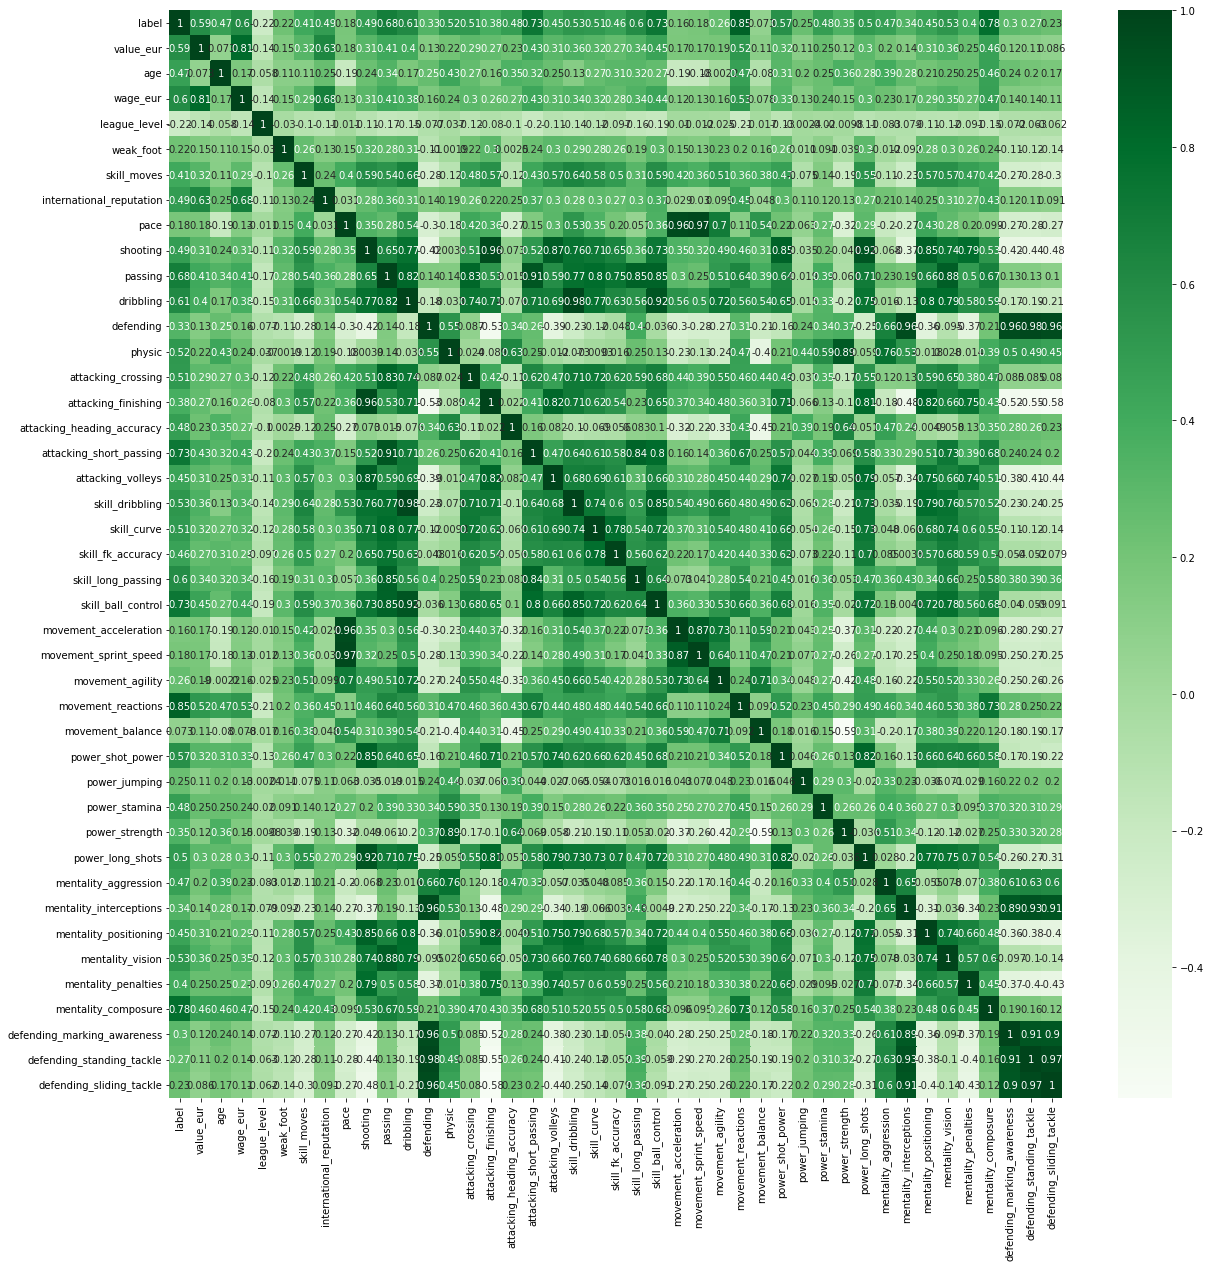

In [49]:
rows = correlation.toArray().tolist()
df2= spark.createDataFrame(rows,df.columns)
corr_matrix_df = pd.DataFrame(data=rows, columns = df.columns, index=df.columns) 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix_df, 
            xticklabels=corr_matrix_df.columns.values,
            yticklabels=corr_matrix_df.columns.values,  cmap="Greens", annot=True)

In [70]:
import pyspark.pandas as ps
df = ps.DataFrame({'short_name': ['L. Messi', 'R. Lewandowski', 'Cristiano Ronaldo','Neymar Jr','K. De Bruyne','J. Oblak','K. Mbappé','M. Neuer',' M. ter Stegen','H. Kane'], 'potential': [93, 92, 91,91,91,93,95,90,92,90]})
df.plot.bar(x='short_name', y='potential') 

# 

# **Time Series analysis**

## Time series data for finding change in value of players across the years

Indicates how much it would cost to pick a player for your fantasy sports team. we had forecasted the player value in (EUR).

In [29]:
from pyspark.sql.functions import col
tsr1 = df.select(col("Year").cast('int'),col("value_eur").cast('int')).groupBy("Year").sum("value_eur")

In [30]:
tsr1 = tsr1.toPandas()

In [31]:
tsr1.sort_values("Year", inplace =True)

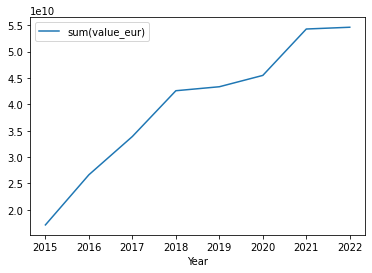

In [32]:
tsr1.set_index("Year").plot()

## Time series data for finding change in wage of players across the years

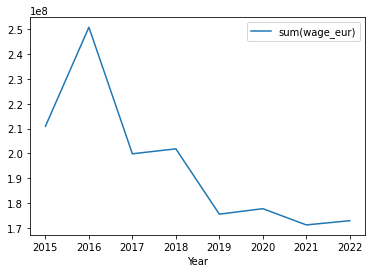

In [14]:
tsr2 = df.select(col("Year").cast('int'),col("wage_eur").cast('int')).groupBy("Year").sum("wage_eur")
tsr2 = tsr2.toPandas()
tsr2.sort_values("Year", inplace =True)
tsr2.set_index("Year").plot()

## Time series data for finding change in average value of players across the years

In [15]:
"""

Creating the time series data for finding change in average value of players across the years

"""

from pyspark.sql.functions import lit
df = df.withColumn("count", lit(1))
tsr3 = df.select(col("Year").cast('int'),col("value_eur").cast('int'),col("count").cast('int') ).groupBy("Year").sum()

In [16]:
tsr3.show()

+----+---------+--------------+----------+
|Year|sum(Year)|sum(value_eur)|sum(count)|
+----+---------+--------------+----------+
|2018| 36231172|   42588800000|     17954|
|2015| 32552325|   17138556000|     16155|
|2019| 36513615|   43344587000|     18085|
|2016| 31495968|   26649144000|     15623|
|2017| 35491132|   33910100000|     17596|
|2022| 38901258|   54628909000|     19239|
|2020| 37335660|   45494458000|     18483|
|2021| 38285824|   54293109000|     18944|
+----+---------+--------------+----------+



In [17]:
tsr3 = tsr3.toPandas()
tsr3.sort_values("Year", inplace =True)
tsr3.head()

,Year,sum(Year),sum(value_eur),sum(count)
1,2015,32552325,17138556000,16155
3,2016,31495968,26649144000,15623
4,2017,35491132,33910100000,17596
0,2018,36231172,42588800000,17954
2,2019,36513615,43344587000,18085


In [18]:
tsr3 = tsr3.set_index("Year")


In [19]:
tsr3["avg_value"] = tsr3["sum(value_eur)"]/ tsr3["sum(count)"]

In [20]:
tsr3 = tsr3["avg_value"]

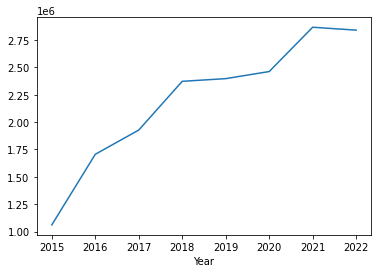

In [21]:
tsr3.plot()

## Time series data for finding change in average wage of players across the years

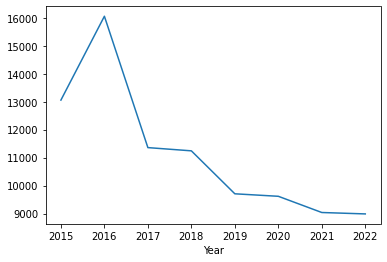

In [33]:

tsr4 = df.select(col("Year").cast('int'),col("wage_eur").cast('int'),col("count").cast('int') ).groupBy("Year").sum()
tsr4 = tsr4.toPandas()
tsr4.sort_values("Year", inplace =True)
tsr4 = tsr4.set_index("Year")
tsr4["avg_wage"] = tsr4["sum(wage_eur)"]/ tsr4["sum(count)"]
tsr4 = tsr4["avg_wage"]
tsr4.plot()

## Time series data for finding change in average overall stats of players across the years


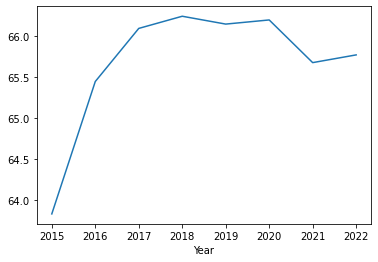

In [23]:
tsr4 = df.select(col("Year").cast('int'),col("overall").cast('int'),col("count").cast('int') ).groupBy("Year").sum()
tsr4 = tsr4.toPandas()
tsr4.sort_values("Year", inplace =True)
tsr4 = tsr4.set_index("Year")
tsr4["overall"] = tsr4["sum(overall)"]/ tsr4["sum(count)"]
tsr4 = tsr4["overall"]
tsr4.plot()

## Time series data for finding change in average potential of players across the years

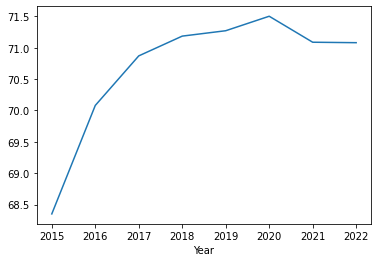

In [24]:
tsr4 = df.select(col("Year").cast('int'),col("potential").cast('int'),col("count").cast('int') ).groupBy("Year").sum()
tsr4 = tsr4.toPandas()
tsr4.sort_values("Year", inplace =True)
tsr4 = tsr4.set_index("Year")
tsr4["potential"] = tsr4["sum(potential)"]/ tsr4["sum(count)"]
tsr4 = tsr4["potential"]
tsr4.plot()

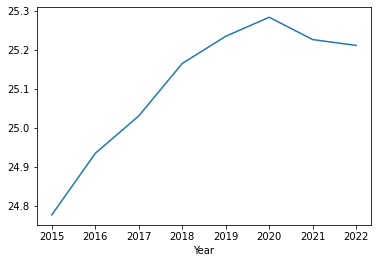

In [25]:
"""

Creating the time series data for finding change in average age of players across the years

"""

tsr4 = df.select(col("Year").cast('int'),col("age").cast('int'),col("count").cast('int') ).groupBy("Year").sum()
tsr4 = tsr4.toPandas()
tsr4.sort_values("Year", inplace =True)
tsr4 = tsr4.set_index("Year")
tsr4["age"] = tsr4["sum(age)"]/ tsr4["sum(count)"]
tsr4 = tsr4["age"]
tsr4.plot()

## Time series data for finding change in average height of players across the years

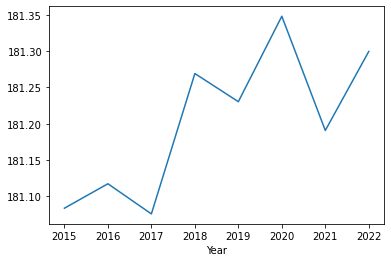

In [26]:

tsr5 = df.select(col("Year").cast('int'),col("height_cm").cast('int'),col("count").cast('int') ).groupBy("Year").sum()
tsr5 = tsr5.toPandas()
tsr5.sort_values("Year", inplace =True)
tsr5 = tsr5.set_index("Year")
tsr5["height"] = tsr5["sum(height_cm)"]/ tsr5["sum(count)"]
tsr5 = tsr5["height"]
tsr5.plot()

## Time series data for finding change in average weight of players across the years

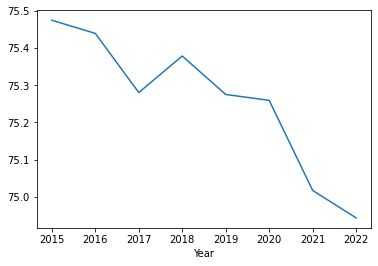

In [27]:
tsr6 = df.select(col("Year").cast('int'),col("weight_kg").cast('int'),col("count").cast('int') ).groupBy("Year").sum()
tsr6 = tsr6.toPandas()
tsr6.sort_values("Year", inplace =True)
tsr6 = tsr6.set_index("Year")
tsr6["weight"] = tsr6["sum(weight_kg)"]/ tsr6["sum(count)"]
tsr6 = tsr6["weight"]
tsr6.plot()

#

# **Machine Learning model to predict the top 10 players based on overall performance**.

## Random-Forest (Regression)

Basesd on various features like shooting, passing , attacking skills an overall score out off 100 is calculated. Which is stored in "Overall" column
based on which the players are ranked.

In [47]:
df = df.withColumnRenamed("overall","label")
df = df.na.drop()

In [50]:
# Random Forest Model

"""

  Creating pipeline for our RF regressor model

"""
from pyspark.ml.regression import RandomForestRegressor

rf = RandomForestRegressor()
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

from pyspark.ml.feature import VectorAssembler

feature_list = []
for col in df.columns:
    feature_list.append(col)

assembler = VectorAssembler(inputCols=feature_list, outputCol="features")
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[assembler, rf])

from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=2)

In [58]:
"""

  Creating the vector assembler for our data to be trained

"""
va_df = assembler.transform(df)
va_df = va_df.select(['features', 'label'])
va_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[94.0,8.7E7,31.0,...|   94|
|[93.0,8.9E7,29.0,...|   93|
|[92.0,8.3E7,29.0,...|   92|
+--------------------+-----+
only showing top 3 rows



In [54]:
"""

  Train test split

"""

(trainingData, testData) = va_df.randomSplit([0.8, 0.2])
"""

  Creating random forest regressor instance and training the data

"""

rf = RandomForestRegressor(seed=69)
model = rf.fit(trainingData)
predictions1 = model.transform(testData)
pred = predictions1
predictions1.show()

+--------------------+-----+------------------+
|            features|label|        prediction|
+--------------------+-----+------------------+
|[46.0,60000.0,18....|   46|51.003153879805865|
|[46.0,70000.0,17....|   46| 50.97082510617615|
|[47.0,35000.0,20....|   47|51.931501470542344|
|[47.0,50000.0,17....|   47| 50.97082510617615|
|[47.0,50000.0,18....|   47| 50.97082510617615|
|[47.0,60000.0,17....|   47| 50.97082510617615|
|[47.0,60000.0,18....|   47| 51.20564366699948|
|[47.0,60000.0,19....|   47| 50.97082510617615|
|[47.0,70000.0,16....|   47|51.111551873462595|
|[48.0,40000.0,25....|   48|51.022714116952045|
|[48.0,45000.0,18....|   48|51.003153879805865|
|[48.0,50000.0,19....|   48| 51.00545060998269|
|[48.0,60000.0,16....|   48| 50.97082510617615|
|[48.0,60000.0,17....|   48| 50.97082510617615|
|[48.0,60000.0,18....|   48|51.003153879805865|
|[48.0,60000.0,19....|   48| 51.34970499727457|
|[48.0,60000.0,19....|   48| 50.97082510617615|
|[48.0,70000.0,17....|   48| 50.97082510

In [55]:
y_pred=pred.select("prediction").collect()
y_orig=pred.select("label").collect()

from sklearn.metrics import r2_score

print(r2_score(y_orig, y_pred))

0.9902414976009785


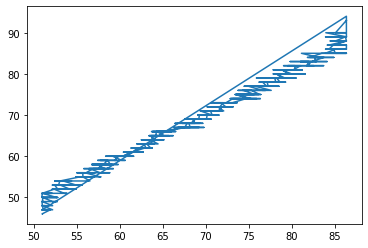

In [57]:
"""

  Plotting the predicted data along the original line and seeing the difference

"""


import matplotlib.pyplot as plt

plt.plot(y_pred, y_orig)

In [59]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
print('Mean absolute error:', mean_absolute_error(y_orig, y_pred))

Mean absolute error: 0.5019175525447426


Mean absolute error = 0.50,
r2 score = 0.99

The straight line in between represents the original value.
The slight variations towards the edges represent the predicted value.
Here we had performed regression random forest algorithm. The accuracy achieved is 99%

## Gradient-boosted (Regression)

In [60]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator


In [61]:
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(va_df)
(trainingData, testData) = va_df.randomSplit([0.7, 0.3])
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)
pipeline = Pipeline(stages=[featureIndexer, gbt])
model = pipeline.fit(trainingData)
predictions2 = model.transform(testData)
predictions2.select("prediction", "label", "features").show(10)

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|49.867172434074014|   45|[45.0,70000.0,18....|
|50.039291265037036|   46|[46.0,40000.0,18....|
|  50.0775595463637|   46|[46.0,50000.0,18....|
|49.867172434074014|   46|[46.0,60000.0,17....|
|49.867172434074014|   46|[46.0,60000.0,18....|
|50.039291265037036|   46|[46.0,60000.0,18....|
| 50.22188414837345|   46|[46.0,70000.0,17....|
|50.039291265037036|   47|[47.0,35000.0,20....|
| 50.22188414837345|   47|[47.0,40000.0,17....|
|50.039291265037036|   47|[47.0,50000.0,17....|
+------------------+-----+--------------------+
only showing top 10 rows



In [62]:
y_predictionCol=predictions2.select("prediction").collect()
y_origcol1=predictions2.select("label").collect()
from sklearn.metrics import r2_score

print(r2_score(y_predictionCol, y_origcol1))

0.9981328021809843


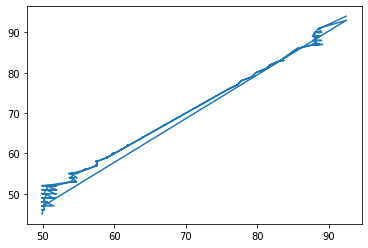

In [63]:
import matplotlib.pyplot as plt

plt.plot(y_predictionCol, y_origcol1)

In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
print('Mean absolute error:', mean_absolute_error(y_origcol1, y_predictionCol))

Mean absolute error: 0.09646067906263323


In [65]:
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions2)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.299397


Mean absolute error = 0.96,
Root Mean Squared Error(RMSE) = 0.2

The straight line in between represents the original value.
The slight variations towards the edges represent the predicted value.
Here we had performed regression gradient boosted algorithm. 

Both the models performed equally well.

# **Result - TOP 10 players in the year 2022**

In [68]:
df1 = df.filter( (df.Year  == "2022"))
from pyspark.sql.functions import col
df22=df1.select(col("short_name"),col("nationality_name"),col("age"),col("year"),col("potential")).show(10)

+-----------------+----------------+---+----+---------+
|       short_name|nationality_name|age|year|potential|
+-----------------+----------------+---+----+---------+
|         L. Messi|       Argentina| 34|2022|       93|
|   R. Lewandowski|          Poland| 32|2022|       92|
|Cristiano Ronaldo|        Portugal| 36|2022|       91|
|        Neymar Jr|          Brazil| 29|2022|       91|
|     K. De Bruyne|         Belgium| 30|2022|       91|
|         J. Oblak|        Slovenia| 28|2022|       93|
|        K. Mbappé|          France| 22|2022|       95|
|         M. Neuer|         Germany| 35|2022|       90|
|    M. ter Stegen|         Germany| 29|2022|       92|
|          H. Kane|         England| 27|2022|       90|
+-----------------+----------------+---+----+---------+
only showing top 10 rows

